### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

### 3.5 ###

In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

In [3]:
import numpy as np

X = np.vstack((np.ones((1,4)), x_hw)).T
Y = np.array([y_hw]).T
X, Y

(array([[  1.,  50.],
        [  1.,  60.],
        [  1.,  70.],
        [  1., 100.]]),
 array([[10],
        [15],
        [40],
        [45]]))

[[-22.5       ]
 [  0.71428571]]


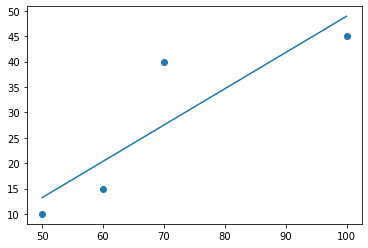

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x_hw, y_hw)

#Делаем SVD и выводим линейную функцию на график
from numpy.linalg import inv

W = inv((X.T).dot(X)).dot(X.T).dot(Y)
print(W)

X_support = np.linspace(50, 100, num=100)
Y_model = W[0][0] + W[1][0]*X_support
plt.plot(X_support, Y_model)
plt.show()

### 3.9 Z-score ###

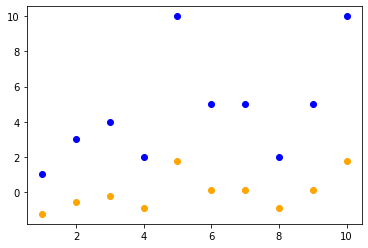

In [5]:
# 5 часть - z-score - Тренировочное задание
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x = np.linspace(1,10,num=10)
y = np.array([1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.], dtype=np.float32)

#StandardScaler().fit_transform([y])
y_ = StandardScaler().fit_transform(y.reshape((-1, 1)))

plt.scatter(x, y, color="blue")
plt.scatter(x, y_, color="orange")
plt.show()

### 3.11. Простое - Полиномиальная регрессия

r2-scores:  [0.7722007722007722, 0.8921905330745116, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

W:  [[ 9.50000000e+02]
 [-4.43833333e+01]
 [ 6.70000000e-01]
 [-3.16666667e-03]]


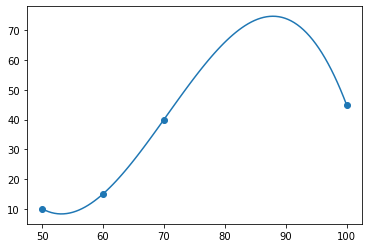

In [6]:
#2 часть - подбираем полином

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def poly_X(degree):
    if degree == 1:
        return X
    X_ = np.copy(X)
    for j in range(2, degree+1):
        X_ = np.hstack((X_, X[:, 1:]**j))
    return X_

models = []
for i in range(1,11):
    model = LinearRegression()
    model.fit(poly_X(i), Y)
    models.append(model)

scores = [r2_score(Y, model.predict(poly_X(i+1))) for (i, model) in enumerate(models)]

print('r2-scores: ',scores)
#Отсюда вывод, что достаточно 3 степени полинома
W = np.array(models[2].coef_)
W[0][0] = models[2].intercept_
print('\nW: ', W.T)

X_support = np.linspace(50, 100, num=100)
Y_model = [W.dot(np.array([1, x, x**2, x**3])) for x in X_support]
plt.scatter(x_hw, y_hw)
plt.plot(X_support, Y_model)
plt.show()

### 3.11 - среднее

In [7]:
#3 часть - пишем класс, который опять же выполняет SVD?

class MyLinearReg:
    def __init__(self):
        self.W = None
    
    def fit(self, x, y):
        self.W = inv((x.T).dot(x)).dot(x.T).dot(y)
    
    def predict(self, x): # X может быть и батчем N строк
        return X.dot(self.W)

reg = MyLinearReg()
reg.fit(X, Y)
reg.predict(X)

array([[13.21428571],
       [20.35714286],
       [27.5       ],
       [48.92857143]])

### 3.12. - высокое (Бостон)

In [8]:
# 4 часть - работаем с Бостоном
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

X, Y = load_boston(return_X_y=True)
Xt, Xv, Yt, Yv = train_test_split(X, Y, train_size=0.8, random_state=42)

lr = LinearRegression()
lr.fit(Xt, Yt)

r2_score(Yv, lr.predict(Xv))

0.6687594935356314

### 3.9 Z-score ###

In [9]:
# z-score на датасете бостона
X_ = StandardScaler().fit_transform(X)
Xt, Xv, Yt, Yv = train_test_split(X_, Y, random_state=42)

lr = LinearRegression()
lr.fit(Xt, Yt)

r2_score(Yv, lr.predict(Xv))

#R2-score немного вырос

0.6844267283527146